# Basic data exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
s=pd.read_csv("may-jan.csv")

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\4029926062.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  s=pd.read_csv("may-jan.csv")


In [3]:
s.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'Grid Power Factor',
       'Inverter Temperature(℃)', 'Inverter Status',
       'Generation Yesterday(kWh)', 'System Time'],
      dtype='object')

In [4]:
s['Inverter Status'].value_counts()

1022       32241
1022        5683
1025         499
1025         112
Standby       28
Name: Inverter Status, dtype: int64

In [5]:
x=s.columns
l=[]
for i in range(1,len(x)-1):
    l.append(s[x[i]].value_counts())
for i in l:
    print(i)

200.1    225
200.0    192
632.1    181
636.0    180
640.1    180
        ... 
137.8      1
385.5      1
433.6      1
124.4      1
179.5      1
Name: DC Voltage PV1(V), Length: 3442, dtype: int64
200.1    191
200.0    171
616.1    149
620.0    120
624.2    119
        ... 
184.2      1
410.5      1
348.0      1
214.5      1
422.0      1
Name: DC Voltage PV2(V), Length: 3364, dtype: int64
200.1    253
200.0    253
636.1    183
620.0    181
628.1    174
        ... 
430.9      1
311.5      1
142.4      1
162.1      1
170.8      1
Name: DC Voltage PV3(V), Length: 3508, dtype: int64
200.0    256
200.1    219
672.1    218
672.0    210
671.9    207
        ... 
135.2      1
385.9      1
472.1      1
122.8      1
174.0      1
Name: DC Voltage PV4(V), Length: 3478, dtype: int64
0.1     3130
0.2     1467
0.3     1321
0.4     1070
0.5      942
        ... 
10.5       2
10.3       1
11.6       1
10.1       1
10.8       1
Name: DC Current1(A), Length: 109, dtype: int64
0.1     2029
0.2      985
0.3

Conclusion:Alert details, Alert code, Grid power factor, Inverter status attributes doesnt have much unique values

# Converting to datetime

In [6]:
def obj_to_DT(s,x):
    s.loc[:,x] = s[x].astype('string')
    s[x]= pd.to_datetime(s[x],dayfirst=True)
    return s

In [7]:
s=obj_to_DT(s,'Time')
s.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\1469766945.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [8]:
s.head(10)

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
5,2022-05-02 06:22:00,268.1,603.6,267.8,252.1,0.2,0.4,0.2,0.2,399,...,50.05,3164,0.1,117029,240,1,35.4,1022,126.9,22-05-2002 06:43
6,2022-05-02 06:27:00,548.0,611.8,523.9,452.3,0.3,0.5,0.3,0.3,763,...,50.03,3164,0.1,117029,480,1,35.7,1022,126.9,22-05-2002 06:48
7,2022-05-02 06:33:00,616.0,624.0,632.1,664.1,0.3,0.6,0.3,0.3,948,...,49.99,3164,0.1,117029,710,1,36.1,1022,126.9,22-05-2002 06:54
8,2022-05-02 06:38:00,628.1,628.0,628.3,660.0,0.4,0.8,0.4,0.4,1268,...,50.06,3164,0.2,117029,1080,1,36.5,1022,126.9,22-05-2002 06:59
9,2022-05-02 06:43:00,627.8,635.3,628.1,667.7,0.6,1.0,0.6,0.5,1722,...,50.01,3164,0.3,117029,1530,1,36.8,1022,126.9,22-05-2002 07:04


# Outlier analysis and removal

In [9]:
from datetime import date

In [10]:
dates=s
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t

2022-06-07    174
2022-06-14    169
2022-06-08    168
2022-08-03    165
2022-06-05    163
             ... 
2022-11-28    102
2022-06-29     82
2022-11-27     31
2022-10-05     19
2022-10-06      5
Name: Time, Length: 273, dtype: int64

In [11]:
# ouliers dates
date_outliers=t.index[-4:]
print(date_outliers)

Index([2022-06-29, 2022-11-27, 2022-10-05, 2022-10-06], dtype='object')


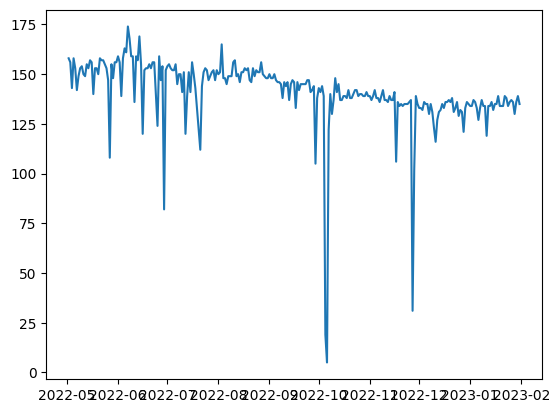

In [12]:
import matplotlib.pyplot as plt
t.plot()
plt.show()

In [13]:
outliersN=pd.read_csv("outliers3.csv") # outliers removed using excel
outliersN

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\1558332269.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  outliersN=pd.read_csv("outliers3.csv") # outliers removed using excel


,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,02-05-2022 05:55,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,02-05-2022 06:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,02-05-2022 06:05,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,02-05-2022 06:12,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,02-05-2022 06:17,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,31-01-2023 18:08,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,31-01-2023 18:14,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,31-01-2023 18:19,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,31-01-2023 18:24,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [14]:
from datetime import time,date
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)#converted time to string
outliersN.dtypes

Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [15]:
import datetime
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)
outliersN

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,2023-01-31 18:08:00,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,2023-01-31 18:14:00,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,2023-01-31 18:19:00,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,2023-01-31 18:24:00,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [16]:
outliersN=outliersN[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)',
       'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)']]

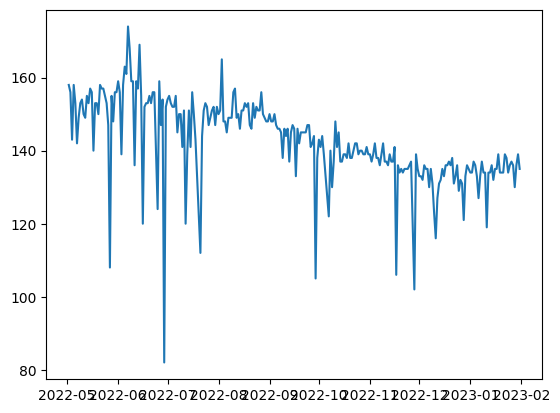

In [17]:
dates=outliersN
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t.plot()
plt.show()

# Converting to 1 HR intervals

In [18]:
outliersN.set_index('Time',inplace= True)
print(outliersN)

                     DC Voltage PV1(V)  DC Voltage PV2(V)  DC Voltage PV3(V)  \
Time                                                                           
2022-05-02 05:55:00               92.2              165.4               94.8   
2022-05-02 06:00:00              200.1              236.2              200.1   
2022-05-02 06:05:00              207.8              344.2              216.1   
2022-05-02 06:12:00              228.1              596.1              228.0   
2022-05-02 06:17:00              240.1              608.1              240.1   
...                                ...                ...                ...   
2023-01-31 18:08:00              473.3              200.1              484.5   
2023-01-31 18:14:00              473.9              200.1              484.9   
2023-01-31 18:19:00              473.8              457.3              445.2   
2023-01-31 18:24:00              384.7              422.0              370.5   
2023-01-31 18:30:00              179.5  

In [19]:

df1=outliersN[['DC Voltage PV1(V)','DC Voltage PV2(V)','DC Voltage PV3(V)',
'DC Voltage PV4(V)','AC Voltage R/U/A(V)','AC Voltage S/V/B(V)',
'AC Voltage T/W/C(V)','AC Output Frequency R(Hz)','Generation of Last Month (Active)(kWh)',
'Inverter Temperature(℃)','Generation Yesterday(kWh)']]
df1=df1.resample("H").mean()

df2=outliersN[['DC Current1(A)','DC Current2(A)','DC Current3(A)',
'DC Current4(A)','Total DC Input Power(W)','AC Current R/U/A(A)',
'AC Current S/V/B(A)','AC Current T/W/C(A)',
'AC Output Total Power (Active)(W)','Power Grid Total Apparent Power(VA)']]
df2=df2.resample("H").sum()
print(df2)

df3=outliersN[['Total Generation (Active)(kWh)','Daily Generation (Active)(kWh)']]
df3=df3.resample("H").max()
print(df3)

                     DC Current1(A)  DC Current2(A)  DC Current3(A)  \
Time                                                                  
2022-05-02 05:00:00             0.1             0.1             0.1   
2022-05-02 06:00:00             5.0             8.8             4.9   
2022-05-02 07:00:00            18.2            30.6            17.5   
2022-05-02 08:00:00            39.6            76.5            39.7   
2022-05-02 09:00:00            52.4           102.9            52.3   
...                             ...             ...             ...   
2023-01-31 14:00:00            45.0            85.4            43.8   
2023-01-31 15:00:00            32.3            60.6            31.6   
2023-01-31 16:00:00            11.5            21.7            11.4   
2023-01-31 17:00:00             4.1             7.9             4.0   
2023-01-31 18:00:00             0.6             0.6             0.6   

                     DC Current4(A)  Total DC Input Power(W)  \
Time        

In [20]:
df1=df1.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()
df1=pd.merge(df1,df2,on='Time')
df1=pd.merge(df1,df3,on='Time')
df1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [21]:
df1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [22]:
#times['actual time']=times['Time'].apply(lambda x: x.time())
#times[times['actual time']==time(6,00,00)]

# Common time interval(6-7)

In [23]:
from datetime import time
solar=df1[df1['Time'].apply(lambda x: x.time()) < time(19,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [24]:
solar=solar[solar['Time'].apply(lambda x: x.time()) > time(6,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
5,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,...,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5
6,2022-05-02 11:00:00,590.469231,588.207692,588.692308,618.700000,227.884615,227.807692,227.053846,49.864615,3164.0,...,77.6,76.8,230917,324.2,325.6,324.1,222870,223250,117090.0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


# Removing few columns in weather dataset

In [25]:
w=pd.read_csv("weather_data_may_to_jan.csv")
w=w.rename(columns = {'datetime':'Time'})

In [26]:
w.columns

Index(['name', 'Time', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [27]:
w1=w[['Time','temp','dew','humidity','precip','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','uvindex']]
print(w1)

                     Time  temp   dew  humidity  precip  windgust  windspeed  \
0     2022-05-01T00:00:00  29.5  15.0     41.31     0.0      24.5        8.5   
1     2022-05-01T01:00:00  29.0  15.0     42.56     0.0      29.5        8.5   
2     2022-05-01T02:00:00  27.5  18.2     56.82     0.0      30.6        1.1   
3     2022-05-01T03:00:00  27.0  16.0     50.99     0.0      26.3        8.4   
4     2022-05-01T04:00:00  28.0  17.0     51.25     0.0      23.8       11.2   
...                   ...   ...   ...       ...     ...       ...        ...   
6619  2023-01-31T19:00:00  24.9  15.1     54.81     0.0      14.4        4.4   
6620  2023-01-31T20:00:00  24.9  15.1     54.27     0.0      14.8        4.3   
6621  2023-01-31T21:00:00  23.0  15.1     61.27     0.0      14.0        1.4   
6622  2023-01-31T22:00:00  21.9  15.2     65.69     0.0      16.2        1.4   
6623  2023-01-31T23:00:00  21.6  15.7     69.00     0.0      14.4        1.2   

      winddir  sealevelpressure  cloudc

In [28]:
w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
w1['Time']= pd.to_datetime(w1['Time'])
w1.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\535805746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\535805746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1['Time']= pd.to_datetime(w1['Time'])


Time                datetime64[ns]
temp                       float64
dew                        float64
humidity                   float64
precip                     float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation               int64
uvindex                      int64
dtype: object

# Merging weather and solar data

In [29]:
weather=w1

In [30]:
d1=pd.merge(solar,weather, on='Time')
print(d1)

                    Time  DC Voltage PV1(V)  DC Voltage PV2(V)  \
0    2022-05-02 07:00:00         637.527273         645.463636   
1    2022-05-02 08:00:00         625.583333         625.608333   
2    2022-05-02 09:00:00         604.027273         608.400000   
3    2022-05-02 10:00:00         605.054545         608.690909   
4    2022-05-02 11:00:00         590.469231         588.207692   
...                  ...                ...                ...   
3295 2023-01-31 14:00:00         619.200000         629.966667   
3296 2023-01-31 15:00:00         629.083333         632.408333   
3297 2023-01-31 16:00:00         640.845455         635.318182   
3298 2023-01-31 17:00:00         615.708333         617.041667   
3299 2023-01-31 18:00:00         364.233333         341.500000   

      DC Voltage PV3(V)  DC Voltage PV4(V)  AC Voltage R/U/A(V)  \
0            608.336364         672.427273           234.718182   
1            621.641667         661.633333           236.733333   
2     

In [31]:
d1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
1,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
2,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
3,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,...,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6
4,2022-05-02 11:00:00,590.469231,588.207692,588.692308,618.700000,227.884615,227.807692,227.053846,49.864615,3164.0,...,35.51,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,39.18,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9
3296,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,38.42,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8
3297,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,38.42,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5
3298,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,41.95,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2


In [32]:
d1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'temp', 'dew', 'humidity', 'precip',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex'],
      dtype='object')

In [33]:
d1=d1[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)','AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex']]

In [34]:
d1['DC total voltage (v)']=d1['DC Voltage PV1(V)']+d1['DC Voltage PV2(V)']+d1['DC Voltage PV4(V)']+d1['DC Voltage PV3(V)']

In [35]:
d1['DC total current(A)']=d1['DC Current1(A)']+d1['DC Current2(A)']+d1['DC Current3(A)']+d1['DC Current4(A)']

In [36]:
d1['AC total voltage (v)']=d1['AC Voltage R/U/A(V)']+d1['AC Voltage S/V/B(V)']+d1['AC Voltage T/W/C(V)']

In [37]:
d1['AC total current(A)']=d1['AC Current R/U/A(A)']+d1[ 'AC Current S/V/B(A)']+d1[ 'AC Current T/W/C(A)']

In [38]:
d1=d1[['Time', 'DC total voltage (v)','DC total current(A)',  'Total DC Input Power(W)',
       'AC total voltage (v)','AC total current(A)', 'AC Output Total Power (Active)(W)', 
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex','Daily Generation (Active)(kWh)']]

In [39]:
d1

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
1,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
2,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
3,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
4,2022-05-02 11:00:00,2386.069231,389.0,230917,682.746154,973.9,222870,49.864615,64.761538,3164.0,...,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481,5,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,2023-01-31 14:00:00,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,2975.0,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3296,2023-01-31 15:00:00,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,2975.0,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3297,2023-01-31 16:00:00,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,2975.0,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3298,2023-01-31 17:00:00,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,2975.0,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [40]:
d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex']

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\1175653099.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',


In [41]:
d1.target = d1["Daily Generation (Active)(kWh)"] 

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\1881836277.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d1.target = d1["Daily Generation (Active)(kWh)"]


In [42]:
d1.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [43]:
d1.dtypes

Time                                      datetime64[ns]
DC total voltage (v)                             float64
DC total current(A)                              float64
Total DC Input Power(W)                            int64
AC total voltage (v)                             float64
AC total current(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)                        float64
Inverter Temperature(℃)                          float64
Generation of Last Month (Active)(kWh)           float64
Daily Generation (Active)(kWh)                   float64
Total Generation (Active)(kWh)                   float64
Power Grid Total Apparent Power(VA)                int64
temp                                             float64
dew                                              float64
humidity                                         float64
precip                                           float64
windgust                       

In [44]:
d1.insert(1,'Date',d1['Time'].apply(lambda x: x.date()))
d1

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 07:00:00,2022-05-02,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
1,2022-05-02 08:00:00,2022-05-02,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
2,2022-05-02 09:00:00,2022-05-02,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
3,2022-05-02 10:00:00,2022-05-02,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
4,2022-05-02 11:00:00,2022-05-02,2386.069231,389.0,230917,682.746154,973.9,222870,49.864615,64.761538,...,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481,5,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,2023-01-31 14:00:00,2023-01-31,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3296,2023-01-31 15:00:00,2023-01-31,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3297,2023-01-31 16:00:00,2023-01-31,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3298,2023-01-31 17:00:00,2023-01-31,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [45]:
d1.dtypes

Time                                      datetime64[ns]
Date                                              object
DC total voltage (v)                             float64
DC total current(A)                              float64
Total DC Input Power(W)                            int64
AC total voltage (v)                             float64
AC total current(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)                        float64
Inverter Temperature(℃)                          float64
Generation of Last Month (Active)(kWh)           float64
Daily Generation (Active)(kWh)                   float64
Total Generation (Active)(kWh)                   float64
Power Grid Total Apparent Power(VA)                int64
temp                                             float64
dew                                              float64
humidity                                         float64
precip                         

In [46]:
d1['Time']=d1['Time'].apply(lambda x: x.time())
d1

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,07:00:00,2022-05-02,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
1,08:00:00,2022-05-02,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
2,09:00:00,2022-05-02,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
3,10:00:00,2022-05-02,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
4,11:00:00,2022-05-02,2386.069231,389.0,230917,682.746154,973.9,222870,49.864615,64.761538,...,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481,5,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,14:00:00,2023-01-31,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3296,15:00:00,2023-01-31,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3297,16:00:00,2023-01-31,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3298,17:00:00,2023-01-31,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
d1['Time']= label_encoder.fit_transform(d1['Time'])

In [48]:
d1=obj_to_DT(d1,'Date')

C:\Users\vaish\AppData\Local\Temp\ipykernel_32664\1469766945.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


In [49]:
d1['Date']= d1['Date'].apply(lambda x: x.date() - date(year=2022,month=1,day=1))

In [50]:
d1['Date']= d1['Date'].apply(lambda x: str(x))
d1['Date']= d1['Date'].apply(lambda x: int(x[0:3]))

In [51]:
x = d1.drop("Daily Generation (Active)(kWh)",axis=1)   #Feature Matrix
y = d1["Daily Generation (Active)(kWh)"] 

In [52]:
x.head()

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,0,121,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
1,1,121,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
2,2,121,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
3,3,121,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6
4,4,121,2386.069231,389.0,230917,682.746154,973.9,222870,49.864615,64.761538,...,35.51,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481,5


In [53]:
x.corr()

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
Time,1.000000e+00,-1.084776e-15,-0.539070,-0.299877,-0.315881,0.019719,-0.317377,-0.316097,-0.008792,0.039340,...,-0.299713,0.016317,-0.094250,0.017781,-0.052384,-0.285959,0.020637,0.188561,0.204328,0.188550
Date,-1.084776e-15,1.000000e+00,-0.039634,-0.004916,0.005385,0.094212,-0.007934,0.006284,-0.014307,-0.245228,...,-0.299368,-0.047487,-0.374587,-0.021157,-0.530771,0.780633,-0.439164,-0.122370,0.028334,0.021053
DC total voltage (v),-5.390703e-01,-3.963389e-02,1.000000,0.220659,0.241369,-0.076233,0.245531,0.240868,-0.089126,0.071411,...,0.126930,-0.022103,0.108239,0.076749,0.096588,-0.005911,0.110516,-0.070707,0.107370,0.134732
DC total current(A),-2.998770e-01,-4.916324e-03,0.220659,1.000000,0.998900,0.150124,0.997473,0.998772,0.052226,0.853687,...,-0.316872,-0.052444,-0.136894,0.124146,0.015419,0.170659,-0.301490,0.187812,0.628458,0.632375
Total DC Input Power(W),-3.158812e-01,5.384695e-03,0.241369,0.998900,1.000000,0.152314,0.998563,0.999979,0.054120,0.840736,...,-0.306245,-0.053393,-0.127190,0.132522,0.013397,0.179822,-0.294158,0.180125,0.619062,0.623492
AC total voltage (v),1.971857e-02,9.421214e-02,-0.076233,0.150124,0.152314,1.000000,0.128881,0.152377,0.840132,0.067028,...,-0.007983,0.004696,0.045012,0.090639,-0.015722,0.026336,-0.052057,0.007343,0.023859,0.020810
AC total current(A),-3.173767e-01,-7.934388e-03,0.245531,0.997473,0.998563,0.128881,1.000000,0.998473,0.053815,0.846234,...,-0.302627,-0.053773,-0.125466,0.129056,0.020120,0.172517,-0.286178,0.181035,0.618760,0.623412
AC Output Total Power (Active)(W),-3.160966e-01,6.283700e-03,0.240868,0.998772,0.999979,0.152377,0.998473,1.000000,0.053399,0.840184,...,-0.306165,-0.053725,-0.126787,0.133432,0.013218,0.180624,-0.294335,0.179948,0.618888,0.623229
AC Output Frequency R(Hz),-8.791717e-03,-1.430662e-02,-0.089126,0.052226,0.054120,0.840132,0.053815,0.053399,1.000000,0.039927,...,0.051430,0.005750,0.039774,0.022836,0.011285,-0.006334,0.043077,-0.018211,-0.047428,-0.049186
Inverter Temperature(℃),3.934019e-02,-2.452278e-01,0.071411,0.853687,0.840736,0.067028,0.846234,0.840184,0.039927,1.000000,...,-0.472707,-0.064606,-0.226890,0.046944,0.077294,-0.088406,-0.277524,0.322344,0.773481,0.773297


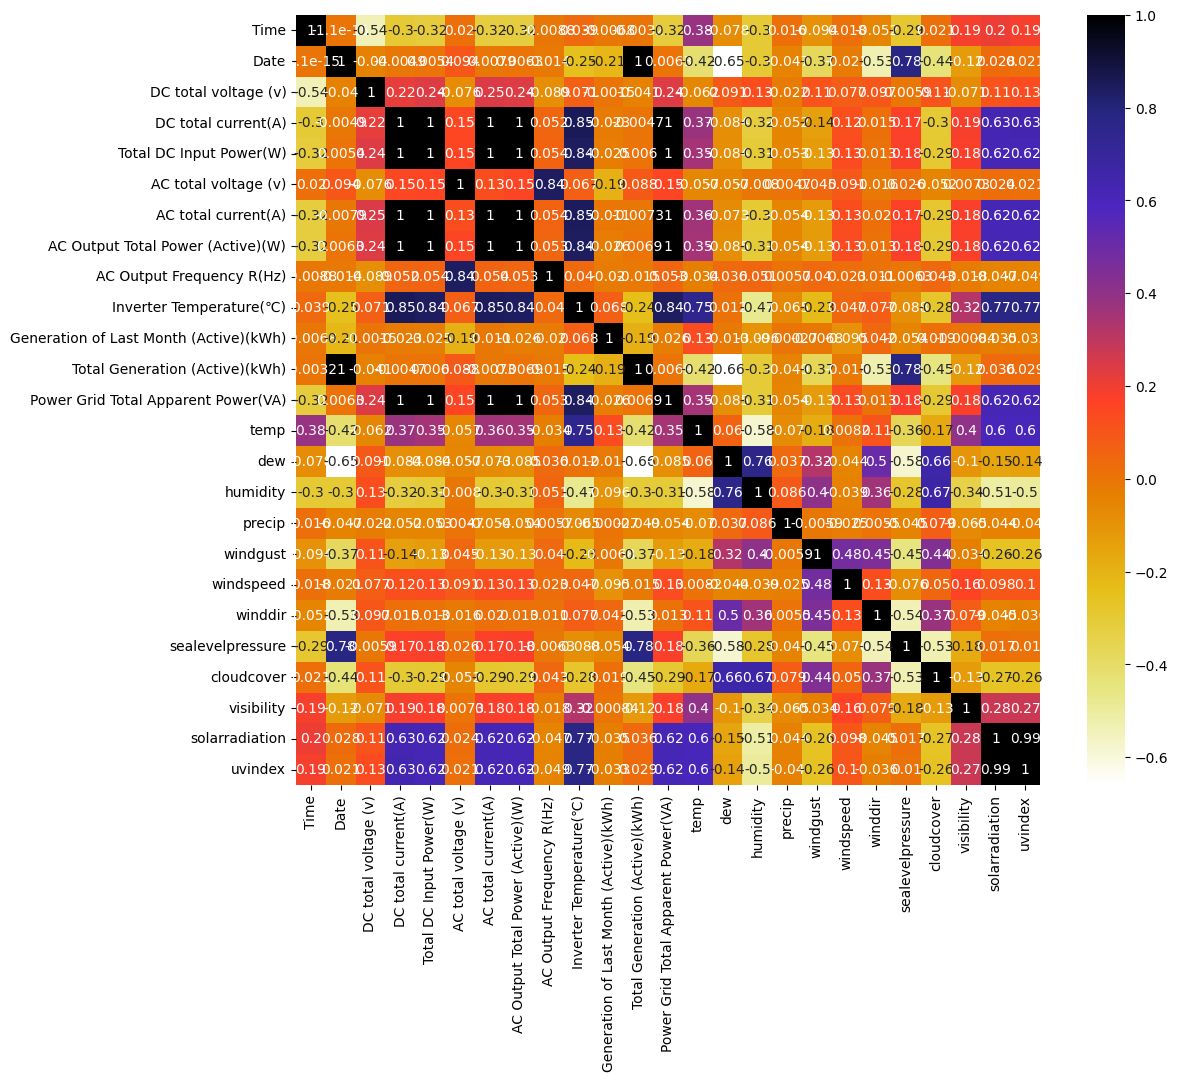

In [54]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
corr_features = correlation(x, 0.85)
len(set(corr_features))

7

In [57]:
corr_features

{'AC Output Total Power (Active)(W)',
 'AC total current(A)',
 'Inverter Temperature(℃)',
 'Power Grid Total Apparent Power(VA)',
 'Total DC Input Power(W)',
 'Total Generation (Active)(kWh)',
 'uvindex'}

In [58]:
d2=x.drop(corr_features,axis=1)

In [59]:
d2

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
0,0,121,2563.754545,83.7,707.018182,50.061818,3164.0,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22
1,1,121,2534.466667,194.8,711.100000,50.080000,3164.0,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159
2,2,121,2459.145455,259.4,700.600000,50.028182,3164.0,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457
3,3,121,2464.709091,241.9,685.054545,49.974545,3164.0,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607
4,4,121,2386.069231,389.0,682.746154,49.864615,3164.0,35.1,17.6,35.51,0.0,17.3,7.5,299.0,1006.4,31.6,7.8,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,7,395,2534.533333,217.3,693.775000,49.996667,2975.0,29.3,14.0,39.18,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856
3296,8,395,2560.966667,155.5,680.283333,49.916667,2975.0,28.9,13.3,38.42,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772
3297,9,395,2578.127273,55.8,683.236364,49.970000,2975.0,28.9,13.3,38.42,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484
3298,10,395,2434.925000,19.8,696.691667,50.040000,2975.0,28.3,14.2,41.95,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209


In [60]:
d2.columns

Index(['Time', 'Date', 'DC total voltage (v)', 'DC total current(A)',
       'AC total voltage (v)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation'],
      dtype='object')

In [61]:
d= d1.iloc[:,-1:]
d

,Daily Generation (Active)(kWh)
0,5.3
1,15.3
2,28.7
3,41.5
4,60.9
...,...
3295,87.9
3296,95.9
3297,99.0
3298,100.0


In [62]:
d2=d2.join(d)

In [63]:
d2.drop('Generation of Last Month (Active)(kWh)',axis=1,inplace=True)

In [64]:
d2.to_csv('finalData.csv')